# ***GRADUATE ROTATIONAL INTERNSHIP PROGRAM (SPARKS FOUNDATION)***
## ***DATA SCIENCE AND BUSINESS ANALYTICS***

## **TASK 1 : PREDICTION USING SUPERVISED MACHINE LEARNING MODELS**
##### **AUTHOR: VIDULA AROLKAR**

#### **OBJECTIVE: Predict the percentage of a student based on the no. of study hours.**

Importing the required Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Loading the data set:

In [2]:
score_data = pd.read_csv('/content/student_scores - student_scores.csv')
score_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [32]:
print('Total Rows :' , score_data.shape[0])
print('Total Columns:',score_data.shape[1])


Total Rows : 25
Total Columns: 2


Basic Sanity Check of the Data:

In [3]:
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


***Both the variables are of Integer data type***

Summary of the data:

In [4]:
score_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **INFERENCE:**
1. TOTAL RECORDS: 25
2. MAXIMUM SCORE: 95
3. MINIMUM SCORE: 17
4. MAXIMUM STUDY HOURS : 9.2
5. MINIMUM STUDY HOURS : 1.1










Check for Missing values:

In [33]:
score_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

***There are no missing values in the data set. The data is clean enough to proceed.***

## **EXLORATORY DATA ANALYSIS:**

Check the spread of the Data :

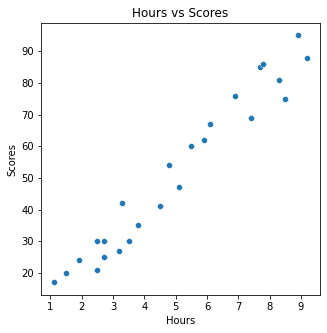

In [35]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Hours', y='Scores', data=score_data)
plt.title('Hours vs Scores')
plt.show()

***We can see that the data is linear in nature. And it has positive correlation.***

Histogram for Scores:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


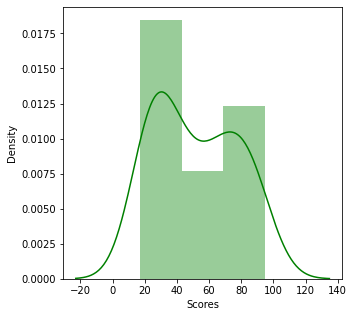

In [58]:
plt.figure(figsize=(5,5))
sns.distplot(score_data['Scores'],color='green')
plt.show()


Check for Outliers in the data:

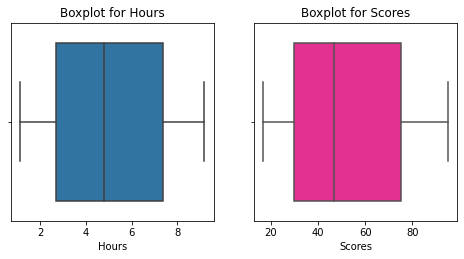

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.boxplot(x='Hours', data= score_data)
plt.title('Boxplot for Hours')
plt.subplot(2,2,2)
sns.boxplot(x='Scores', color ='deeppink',data= score_data)
plt.title('Boxplot for Scores')
plt.show()

***There are no outliers in the data.***

Check the correlation between the variables:

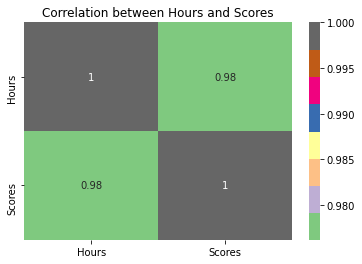

In [43]:
sns.heatmap(score_data.corr(), annot =True, cmap='Accent')
plt.title('Correlation between Hours and Scores')
plt.show()

***The Hours and Score variables are highly correlated with each other. There is Positive correlation between them. So we can say that as the Study Hours increases, the Score may also increase.***

## **MODEL BUILDING**

Split the Target(Score) and Independent(Hours) Variables:

In [44]:
X=score_data.drop('Scores', axis=1)

y=score_data['Scores']


Importing the required libaries for Linear Regression Algorithm.

In [45]:
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # split the data into train and test
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error #evaluation metrics 

Performing Train Test Split:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state =42)

In [14]:
#rows and columns in X_train , X_test after splitting

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [15]:
lr = LinearRegression()  #instantiating the Linear Regression object

lr.fit(X_train,y_train) # fit the data to the Model.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting on the test data:

In [16]:
y_test_pred = lr.predict(X_test)

DataFrame showing the Actual and the Predicted Scores :

In [22]:
scores= pd.DataFrame({'Actual': y_test, 'Predicted':y_test_pred})
scores

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


***There is a very small difference in the values of Actual and Predicted. So we can say that our Model is performing good.***

## **MODEL EVALUATION:**
The metrics we are using here are :
1. R-Squared
2. Mean Absolute Error
3. Mean Squared Error
4. Root Mean Squared Error.

In [47]:
#R-Squared :
print('R-Squared:',r2_score(y_test, y_test_pred))


R-Squared: 0.9678055545167994


### **Inference:** 
#### ***The R-squared value for our Model is 96% which is a good number. We can say that our model is good at predicting the Scores.***

In [50]:
#Mean Absolute Error:

print('Mean Absolute Error:',mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error: 3.9207511902099244


In [48]:
#Mean Squared Error:
print('Mean Squared Error:',mean_squared_error(y_test, y_test_pred))

Mean Squared Error: 18.943211722315272


In [49]:
#Root Mean Squared Error:
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error: 4.352380006653288


### **Inference:**
#### ***The Mean SQuared error, Mean absolute error and the Root Mean Square error should be as low as possible to get a Acuurate model. Here we can say that our model has achieved this accuracy at a great level.***

## **Testing our model to predict the scores for 9.25 hours of study:**

In [31]:
score_pred = lr.predict([[9.25]])
print('Score for 9.25 hours :',score_pred)

Score for 9.25 hours : [92.38611528]


### **Inference:**
#### ***For 9.25 hours of study , the percentage scored by the Student is 92.38% which is a good score and we can conclude that our model is doing a good job.***